In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn import metrics 

In [4]:
df_test = pd.read_csv('mwc22-client_table+-+test_x.csv')

In [5]:
# Cargamos la data client_table y convertirla en un dataframe

In [6]:
df1 = pd.read_csv('mwc22-client_table.csv')
df1.head()

,CLIENT ID,CLIENT_SEGMENT,AVG CONSO,AVG BASKET SIZE,RECEIVED_COMMUNICATION
0,24321771,6,"67,25","201,75",0
1,24321859,2,"58,33",350,0
2,24321880,3,"46,67",112,0
3,24321957,2,50,600,0
4,24321962,4,10,120,0


In [7]:
# Descripcion estadistica de la tabla client_table sin preprocesar los datos

In [8]:
df1.describe()

,CLIENT ID,CLIENT_SEGMENT,RECEIVED_COMMUNICATION
count,3.588400e+04,35884.000000,35884.000000
mean,2.706058e+07,3.123593,0.507998
std,8.835076e+06,1.512932,0.499943
min,1.807311e+07,1.000000,0.000000
25%,2.053311e+07,2.000000,0.000000
50%,2.462190e+07,3.000000,1.000000
75%,3.298538e+07,4.000000,1.000000
max,4.836594e+07,6.000000,1.000000


In [9]:
#  Valores nules y tamanaño de la tabla client_table

In [10]:
df1.isnull().sum()

CLIENT ID                 0
CLIENT_SEGMENT            0
AVG CONSO                 0
AVG BASKET SIZE           0
RECEIVED_COMMUNICATION    0
dtype: int64

In [11]:
df1.shape

(35884, 5)

In [12]:
# Convertimos a variables numericas las columnas 'AVG BASKET SIZE' y 'AVG CONSO' de df1

In [13]:
df1['AVG BASKET SIZE'] = df1['AVG BASKET SIZE'].replace(',', '.',regex=True).astype(float)
df1['AVG CONSO'] = df1['AVG CONSO'].replace(',', '.',regex=True).astype(float)
df1.dtypes

CLIENT ID                   int64
CLIENT_SEGMENT              int64
AVG CONSO                 float64
AVG BASKET SIZE           float64
RECEIVED_COMMUNICATION      int64
dtype: object

In [14]:
# Descripcion estadistica de todas las columnas numericas de la tabla client_table

In [15]:
df1.describe()

,CLIENT ID,CLIENT_SEGMENT,AVG CONSO,AVG BASKET SIZE,RECEIVED_COMMUNICATION
count,3.588400e+04,35884.000000,35884.000000,35884.000000,35884.000000
mean,2.706058e+07,3.123593,64.534437,181.218610,0.507998
std,8.835076e+06,1.512932,64.381932,129.604691,0.499943
min,1.807311e+07,1.000000,0.830000,10.000000,0.000000
25%,2.053311e+07,2.000000,20.830000,100.000000,0.000000
50%,2.462190e+07,3.000000,50.000000,160.000000,1.000000
75%,3.298538e+07,4.000000,88.170000,225.000000,1.000000
max,4.836594e+07,6.000000,2433.330000,3400.200000,1.000000


In [16]:
# Cargamos la data order_table y convertirla en un dataframe

In [17]:
df2 = pd.read_csv('mwc22-orders_table.csv')
df2.head()

,CLIENT ID,NB PRODS,ORDER ID,FRUIT_PRODUCT
0,18070505,5,671907264,Apple
1,18070505,10,671907264,Orange
2,18070505,5,671907264,Kiwi
3,18070505,10,671907264,Pear
4,18070505,5,671907264,Cheery


In [18]:
df2.shape

(66912, 4)

In [19]:
# Hacemos un merge de los dataframe df1 y df2, utilizamos 'inner' en el parametro 'how' para tomar en cuenta solo las filas
# que tienen en comun la columna 'CLIENT ID'

In [20]:
df3 = df1.merge(df2, how='inner')
df3

,CLIENT ID,CLIENT_SEGMENT,AVG CONSO,AVG BASKET SIZE,RECEIVED_COMMUNICATION,NB PRODS,ORDER ID,FRUIT_PRODUCT
0,24321771,6,67.25,201.75,0,2,676480593,Lemon
1,24321880,3,46.67,112.00,0,10,668762140,Orange
2,24321957,2,50.00,600.00,0,20,667332821,Apricot
3,24321957,2,50.00,600.00,0,20,667332821,Orange
4,24322170,1,116.67,200.00,0,5,668261888,Lemon
...,...,...,...,...,...,...,...,...
66867,48335525,3,50.00,200.00,1,10,670782454,Cheery
66868,48365750,3,41.67,125.00,1,1,670187349,Papaya
66869,48365750,3,41.67,125.00,1,9,670187349,Lemon
66870,48365861,3,62.58,125.17,1,10,668693229,Nectarine


In [21]:
print('numero de filas df1 =', len(df1['CLIENT ID'].unique()))
print('numero de filas df2 =', len(df2['CLIENT ID'].unique()))
print('numero de filas df3 =', len(df3['CLIENT ID'].unique()))

numero de filas df1 = 35884
numero de filas df2 = 14499
numero de filas df3 = 14492


In [22]:
# Dataset con las variables preditoras
pd.read_csv('mwc22-client_table+-+test_x.csv').columns

Index(['CLIENT ID', 'AVG CONSO', 'AVG BASKET SIZE', 'RECEIVED_COMMUNICATION'], dtype='object')

In [23]:
df3.drop(['ORDER ID', 'CLIENT ID'], axis=1, inplace=True)

In [24]:
# Matrix de correlacion del dataframe df3 

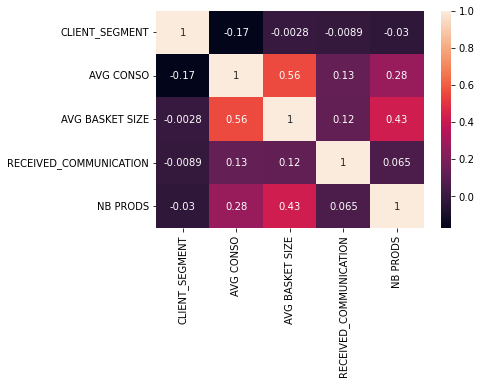

In [25]:
corrMatrix = df3.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [26]:
# Bar donde se muestran el consumo medio mensual de cada fruta

<AxesSubplot:xlabel='FRUIT_PRODUCT'>

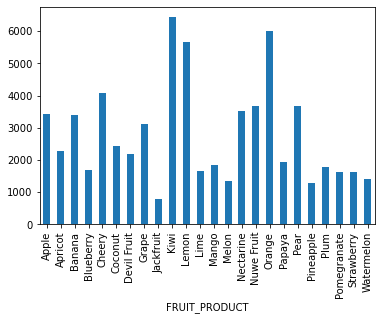

In [27]:
df3.groupby('FRUIT_PRODUCT')['AVG CONSO'].count().plot(kind='bar')

In [28]:
# Numero de clientes que han recibido la promocion y el numero de clientes que no la recibieron

<AxesSubplot:>

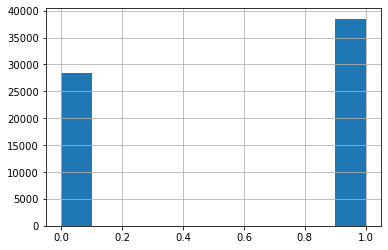

In [29]:
df3.RECEIVED_COMMUNICATION.hist()

In [30]:
# Dividimos la data df1 en las variables X(features) e y(target)

In [31]:
X = df1.drop('CLIENT_SEGMENT', axis = 1)
y = df1['CLIENT_SEGMENT']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [33]:
# Escogemos un random forest como algoritmo clasificador

In [34]:
clf = RandomForestClassifier(n_estimators = 800) 

In [ ]:
# Hacemos un gridsearch para  encontrar los mejores parametros del random forest

In [88]:
def grid_search(df1):
    param_grid = { 
        'n_estimators': [100, 200,400,],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth' : [4,5,6,7,8],
        'criterion' :['gini', 'entropy']
    }
    grid_search_forest = GridSearchCV(clf, param_grid, cv=10, scoring='neg_mean_squared_error')
    grid_search_forest.fit(X_train, y_train)
    print(grid_search_forest.best_params_)
    print(grid_search_forest.best_score_)

In [89]:
grid_search(X_train)

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 400}
-1.407113426709726


In [ ]:
# Escalamos la data para que tengan una distribucion normal

In [36]:
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X_train)

In [37]:
x_scaled = pd.DataFrame(x_scaled)

In [38]:
# Entrenamos el algoritmo

In [39]:
clf = RandomForestClassifier(n_estimators = 400, criterion = 'gini', max_depth = 8, max_features = 'auto')  
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

In [40]:
# Aplicamos el algoritmo a diferente 'trozos' de la data y comparamos resultados

In [41]:
%%time

for train_index, test_index in skf.split(X_train, y_train):
    x_train_fold, x_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    clf.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))
  
# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))
# Lista del accuracy una vez entrenado el modelo y aplicado a los diferetes 'splits'

List of possible accuracy: [0.7784743991640544, 0.778126088470916, 0.7920585161964472, 0.791710205503309, 0.7871821664925113, 0.7903169627307558, 0.7812608847091606, 0.7905923344947735, 0.7878048780487805, 0.7780487804878049]

Maximum Accuracy That can be obtained from this model is: 79.20585161964472 %

Minimum Accuracy: 77.8048780487805 %

Overall Accuracy: 78.55575216298513 %

Standard Deviation is: 0.00592592473993678
Wall time: 1min 32s


In [ ]:
# Prediccion

In [42]:
y_pred = clf.predict(X_test)

In [43]:
f1_score = metrics.f1_score(y_test, y_pred, average='macro')
print('f1_score =', f1_score)

f1_score = 0.6950033976335462


In [44]:
# Convertimos a variables numericas las columnas 'AVG BASKET SIZE' y 'AVG CONSO' de df_test

In [45]:
df_test['AVG BASKET SIZE'] = df_test['AVG BASKET SIZE'].replace(',', '.',regex=True).astype(float)
df_test['AVG CONSO'] = df_test['AVG CONSO'].replace(',', '.',regex=True).astype(float)
df_test.dtypes

CLIENT ID                   int64
AVG CONSO                 float64
AVG BASKET SIZE           float64
RECEIVED_COMMUNICATION      int64
dtype: object

In [46]:
pred = clf.predict(df_test)

In [87]:
results = pd.DataFrame(pred, columns=['CLIENT_SEGMENT']).join(df_test['CLIENT ID'])

In [85]:
results_csv = pd.DataFrame(results, columns=['CLIENT ID', 'CLIENT_SEGMENT']).to_csv('results.csv', header=True, index = False)